In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
from csv import DictReader

In [2]:
hashtag_stance_df = pd.read_csv("org_final_stance_hashtag.csv")
hashtag_stance = hashtag_stance_df["stance"]
stance_df = pd.read_csv("org_final_stance_word.csv")
stance = stance_df["stance"]

In [3]:
info_df = pd.read_csv('org_strength_diversity_word.csv')
info_df["stance"] = stance
info_df.head()

,account_name,predict_class,prochoice_strength,prolife_strength,prolife proportion,prochoice proportion,prolife cnt,prochoice cnt,total cnt,account_type,stance
0,40daysforlife,1,0.163995,0.836005,1.000000,0.000000,18,0,18,1,-0.604458
1,AbolitionAHA,1,0.205865,0.794135,1.000000,0.000000,16,0,16,1,-0.516756
2,AbortionGroup,1,0.266281,0.733719,0.966667,0.033333,29,1,30,1,-0.592169
3,AmerLifeLeague,1,0.088487,0.911513,0.950000,0.050000,19,1,20,1,-0.737758
4,AntiAbrtionGang,1,0.172369,0.827631,1.000000,0.000000,21,0,21,1,-0.765533


In [13]:
info_hashtag_df = pd.read_csv('org_strength_diversity_hashtag.csv')
info_hashtag_df['stance'] = hashtag_stance
info_hashtag_df.tail()

,account_name,predict_class,prochoice_strength,prolife_strength,prolife proportion,prochoice proportion,prolife cnt,prochoice cnt,total cnt,account_type,stance
75,SisterSupporter,0,0.818704,0.181296,0.000000,1.000000,0,7,7,0,0.318704
76,StephHerold,0,0.763232,0.236768,0.000000,1.000000,0,25,25,0,-0.236768
77,TammiKromenaker,0,0.845869,0.154131,0.000000,1.000000,0,7,7,0,-0.154131
78,Voice4ChoiceUK,0,0.847358,0.152642,0.000000,1.000000,0,8,8,0,0.347358
79,WholeWomans,0,0.812740,0.187260,0.035714,0.964286,1,27,28,0,-0.187260


$follower\_of$ column is marked as -1 if the account is a follower of prochoice account, 1 if the account is a follower of prolife account, 0 if both. The stance is in the range [-1, 1], 1 = prochoice, -1 = prolife.

In [5]:
diff = [info_hashtag_df['stance'][i]>0 and info_df['stance'][i]<0 for i in range(0, len(info_hashtag_df['stance']))]
np.sum(diff)

0

In [6]:
diff_2 = [info_hashtag_df['stance'][i]<0 and info_df['stance'][i]>0 for i in range(0, len(info_hashtag_df['stance']))]
np.sum(diff_2)

17

In order to examine the diversity, we would like to look at the individuals who have at least 5 followings out of 80 groups we have. The `info_hashtag_df_5` and `info_df_5` holds the output of the filtering.

In [7]:
info_df_5 = info_df.loc[info_df['total cnt'] >= 5]
info_hashtag_df_5 = info_hashtag_df.loc[info_hashtag_df['total cnt'] >= 5]

In [8]:
info_df_5.to_csv("indiv_info_ls_5.csv", sep=",", index=False)
info_hashtag_df_5.to_csv("indiv_info_hashtag_ls_5.csv", sep=",", index=False)

---
#  "prochoice_strength", "prolife_strength" and the "Account type" 

We will examinate the relationship from the dataframe with result calculated by using different set of words in tweets (hashtag or bag of word).

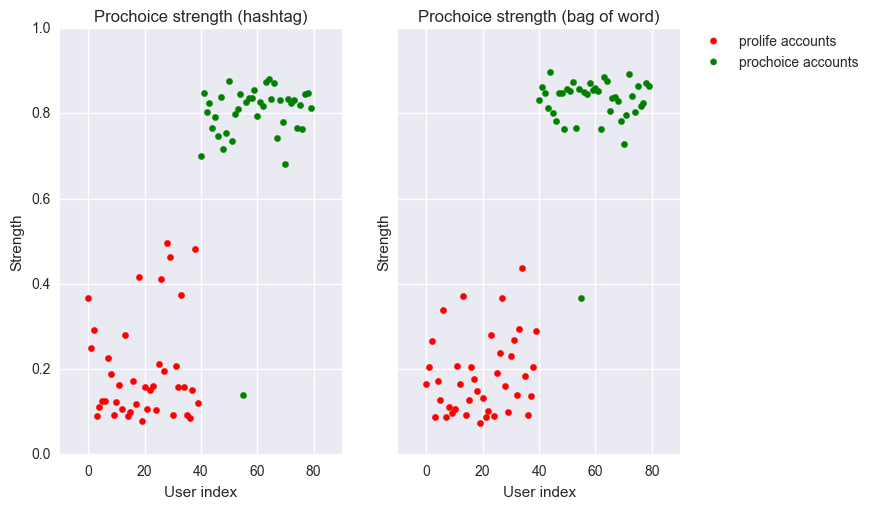

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df[info_hashtag_df['account_type']==1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['account_type']==1, 'prochoice_strength'],
            color='r', label='prolife accounts')
ax1.scatter(x=info_hashtag_df[info_hashtag_df['account_type']==0].index, 
            y=info_hashtag_df.loc[info_hashtag_df['account_type']==0, 'prochoice_strength'],
            color='g', label='prochoice accounts')

ax1.set_ylim([0,1])
ax1.set_title("Prochoice strength (hashtag)")
ax1.set_xlabel("User index")
ax1.set_ylabel("Strength")

ax2.scatter(x=info_df[info_df['account_type']==1].index, 
            y=info_df.loc[info_df['account_type']==1, 'prochoice_strength'],
            color='r', label='prolife accounts')
ax2.scatter(x=info_df[info_df['account_type']==0].index, 
            y=info_df.loc[info_df['account_type']==0, 'prochoice_strength'],
            color='g', label='prochoice accounts')

ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_title("Prochoice strength (bag of word)")
ax2.set_xlabel("User index")
ax2.set_ylabel("Strength")
ax2.set_ylim([0,1])
plt.show()

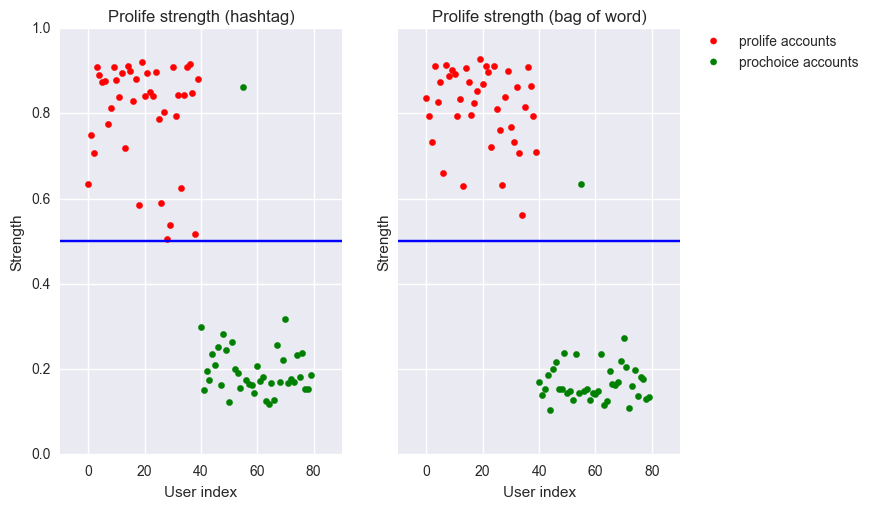

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df[info_hashtag_df['account_type']==1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['account_type']==1, 'prolife_strength'],
            color='r', label='prolife accounts')
ax1.scatter(x=info_hashtag_df[info_hashtag_df['account_type']==0].index, 
            y=info_hashtag_df.loc[info_hashtag_df['account_type']==0, 'prolife_strength'],
            color='g', label='prochoice accounts')
ax1.axhline(y=0.5)
ax1.set_title("Prolife strength (hashtag)")
ax1.set_xlabel("User index")
ax1.set_ylabel("Strength")

ax2.scatter(x=info_df[info_df['account_type']==1].index, 
            y=info_df.loc[info_df['account_type']==1, 'prolife_strength'],
            color='r', label='prolife accounts')
ax2.scatter(x=info_df[info_df['account_type']==0].index, 
            y=info_df.loc[info_df['account_type']==0, 'prolife_strength'],
            color='g', label='prochoice accounts')
ax2.axhline(y=0.5)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_title("Prolife strength (bag of word)")
ax2.set_xlabel("User index")
ax2.set_ylabel("Strength")
plt.show()

---
#### Plot the relationship between the stance and the following proportions

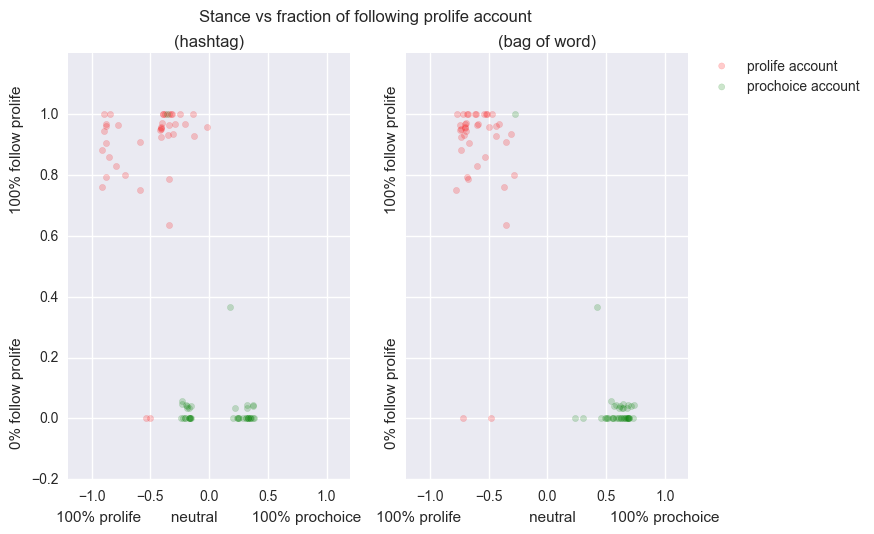

In [20]:

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['account_type']==1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['account_type']==1, "prolife proportion"],
            alpha=0.2, color='r', label='prolife account')
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['account_type']==0, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['account_type']==0, "prolife proportion"],
            alpha=0.2, color='g', label='prochoice account')
ax1.set_title("(hashtag)")
ax1.set_xlabel("100% prolife       neutral        100% prochoice")
ax1.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax1.set_ylabel("0% follow prolife                             100% follow prolife")

ax2.scatter(x=info_df.loc[info_df['account_type']==1, "stance"], 
            y=info_df.loc[info_df['account_type']==1, "prolife proportion"],
            alpha=0.2, color='r', label='prolife account')
ax2.scatter(x=info_df.loc[info_df['account_type']==0, "stance"], 
            y=info_df.loc[info_df['account_type']==0, "prolife proportion"],
            alpha=0.2, color='g', label='prochoice account')
ax2.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax2.set_title("(bag of word)")
ax2.set_xlabel("100% prolife                neutral        100% prochoice")
ax2.set_ylabel("0% follow prolife                             100% follow prolife")
plt.suptitle("Stance vs fraction of following prolife account ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

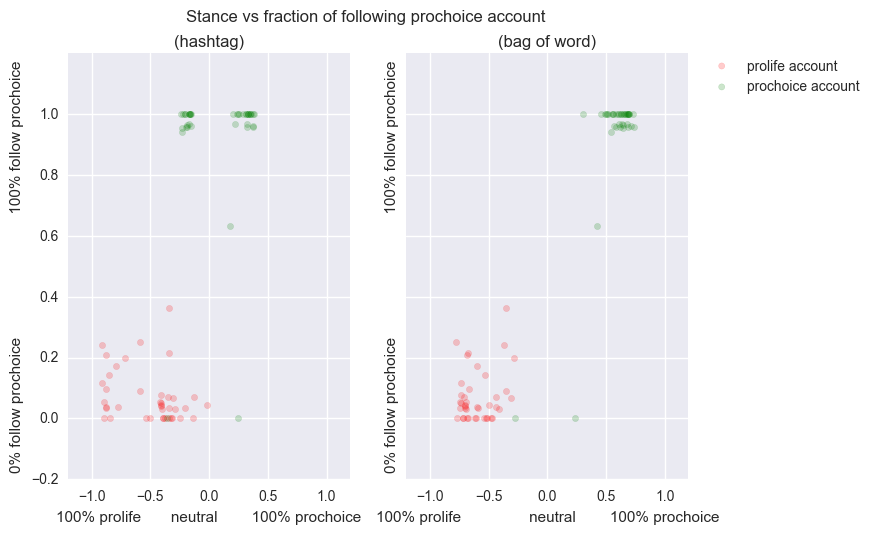

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['account_type']==1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['account_type']==1, "prochoice proportion"],
            alpha=0.2, color='r', label='prolife account')
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['account_type']==0, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['account_type']==0, "prochoice proportion"],
            alpha=0.2, color='g', label='prochoice account')
ax1.set_title("(hashtag)")
ax1.set_xlabel("100% prolife       neutral        100% prochoice")
ax1.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax1.set_ylabel("0% follow prochoice                             100% follow prochoice")

ax2.scatter(x=info_df.loc[info_df['account_type']==1, "stance"], 
            y=info_df.loc[info_df['account_type']==1, "prochoice proportion"],
            alpha=0.2, color='r', label='prolife account')
ax2.scatter(x=info_df.loc[info_df['account_type']==0, "stance"], 
            y=info_df.loc[info_df['account_type']==0, "prochoice proportion"],
            alpha=0.2, color='g', label='prochoice account')
ax2.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax2.set_title("(bag of word)")
ax2.set_xlabel("100% prolife                neutral        100% prochoice")
ax2.set_ylabel("0% follow prochoice                             100% follow prochoice")
plt.suptitle("Stance vs fraction of following prochoice account ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

--------
# Examine unusal individuals with hashtag countings

Individuals who have an extreme stance, e.g. above 0.5 or below -0.5 score, are considered to have more similarities with known prolife/prochoice group. That indicates they tweet in a manner that is similar to prolife/prochoice accounts do. This similarity is in perspective of context and the usage of hashtag. However, if some individuals have a high similarity with a specific group but are following a lot of the opposite group, that is considered to be "unusal" and those are the people we are interested in looking at.

In [26]:
# pick out people whose stance tends to be prochoice but follow more prolife than prochoice
prochoice_unusual_indiv_hashtag = info_hashtag_df_5.loc[info_hashtag_df_5["stance"]>0]\
                          .loc[info_hashtag_df_5["prochoice proportion"]<info_hashtag_df_5["prolife proportion"]] 
prochoice_unusual_indiv_hashtag.shape

(0, 11)

In [27]:
# pick out people whose stance tends to be prolife but follow more prochoice than prolife
prolife_unusual_indiv_hashtag = info_hashtag_df_5.loc[info_hashtag_df_5["stance"]<0]\
                               .loc[info_hashtag_df_5["prochoice proportion"]>info_hashtag_df_5["prolife proportion"]]
prolife_unusual_indiv_hashtag

,account_name,predict_class,prochoice_strength,prolife_strength,prolife proportion,prochoice proportion,prolife cnt,prochoice cnt,total cnt,account_type,stance
42,AbortionCare,0,0.803550,0.196450,0.043478,0.956522,1,22,23,0,-0.196450
43,AbortionFunds,0,0.824843,0.175157,0.000000,1.000000,0,31,31,0,-0.175157
44,abortionpil,0,0.765592,0.234408,0.047619,0.952381,1,20,21,0,-0.234408
47,AbortionSupport,0,0.837161,0.162839,0.000000,1.000000,0,26,26,0,-0.162839
52,ChiAbortionFund,0,0.799160,0.200840,0.000000,1.000000,0,17,17,0,-0.200840
53,DCAbortionFund,0,0.810047,0.189953,0.041667,0.958333,1,23,24,0,-0.189953
54,Doctors4Choice,0,0.845020,0.154980,0.040000,0.960000,1,24,25,0,-0.154980
57,LPJLeague,0,0.835345,0.164655,0.000000,1.000000,0,21,21,0,-0.164655
58,MSFC,0,0.837054,0.162946,0.000000,1.000000,0,17,17,0,-0.162946
60,NCAbortionFund,0,0.793381,0.206619,0.000000,1.000000,0,21,21,0,-0.206619


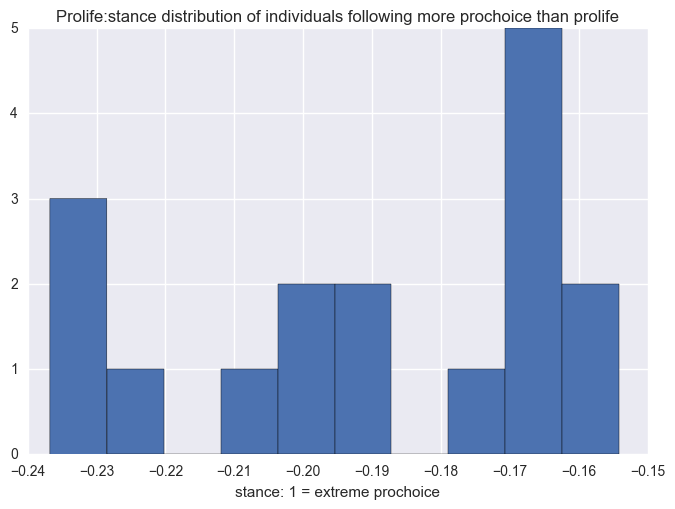

In [28]:
plt.hist(x=prolife_unusual_indiv_hashtag["stance"])
plt.title("Prolife:stance distribution of individuals following more prochoice than prolife")
plt.xlabel("stance: 1 = extreme prochoice")
plt.show()

--------
# Examine unusal individuals with bag-of-word countings

In [29]:
# pick out people whose stance tends to be prochoice but follow more prolife than prochoice
prochoice_unusual_indiv = info_df_5.loc[info_df_5["stance"]>0]\
                                 .loc[info_df_5["prochoice proportion"]<info_df_5["prolife proportion"]]  
prochoice_unusual_indiv

,account_name,predict_class,prochoice_strength,prolife_strength,prolife proportion,prochoice proportion,prolife cnt,prochoice cnt,total cnt,account_type,stance


In [30]:
# pick out people whose stance tends to be prolife but follow more prochoice than prolife
prolife_unusual_indiv = info_df_5.loc[info_df_5["stance"]<0]\
                               .loc[info_df_5["prochoice proportion"]>info_df_5["prolife proportion"]]
prolife_unusual_indiv

,account_name,predict_class,prochoice_strength,prolife_strength,prolife proportion,prochoice proportion,prolife cnt,prochoice cnt,total cnt,account_type,stance


---
# Examine the hashtag/word vector for unusual individuals

In [39]:
data_path = 'hashtag_vec.mat'

data = sio.loadmat(data_path)
org_account_type = data['training_labels'].T
org_account_data = data['training_data'] 
indiv_account_data = data['training_data'] 
indiv_account_order = data['known_account_order'] 

hashtag_df = pd.DataFrame({
    'user': [s.strip() for s in indiv_account_order],
    'hashtag_vector': list(indiv_account_data)
})
hashtag_df.head()

,hashtag_vector,user
0,"[108.0, 6.0, 0.0, 12.0, 0.0, 0.0, 7.0, 4.0, 16...",40daysforlife
1,"[12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0,...",AbolitionAHA
2,"[1808.0, 926.0, 1159.0, 9.0, 0.0, 1019.0, 10.0...",AbortionGroup
3,"[301.0, 9.0, 7.0, 38.0, 12.0, 0.0, 29.0, 50.0,...",AmerLifeLeague
4,"[2914.0, 821.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",AntiAbrtionGang


In [40]:
data_path = 'word_vec.mat'

data = sio.loadmat(data_path)
print(data.keys())
org_account_type = data['training_labels'].T
org_account_data = data['training_data'] 
indiv_account_data = data['training_data'] 
indiv_account_order = data['known_account_order'] 

word_df = pd.DataFrame({
    'user': [s.strip() for s in indiv_account_order],
    'word_vector': list(indiv_account_data)
})
word_df.head()

dict_keys(['__header__', 'individual_account_order', 'individual_data', 'training_labels', '__globals__', '__version__', 'training_data', 'known_account_order'])


,user,word_vector
0,40daysforlife,"[0.0, 19.0, 0.0, 0.0, 0.0, 231.0, 29.0, 0.0, 1..."
1,AbolitionAHA,"[0.0, 16.0, 0.0, 16.0, 0.0, 34.0, 36.0, 10.0, ..."
2,AbortionGroup,"[0.0, 60.0, 18.0, 3.0, 1028.0, 134.0, 294.0, 1..."
3,AmerLifeLeague,"[0.0, 31.0, 11.0, 27.0, 0.0, 65.0, 73.0, 36.0,..."
4,AntiAbrtionGang,"[0.0, 17.0, 3.0, 14.0, 0.0, 44.0, 83.0, 0.0, 3..."


In [41]:
with open("select_word.csv") as f:
    words = [row["word"].strip() for row in DictReader(f)]

with open("select_hashtag.csv") as f:
    hashtags = [row["word"].strip() for row in DictReader(f)]

def get_hashtag_vec(user_name):
    result = []
    for n in hashtag_df.loc[hashtag_df['user']==user_name, 'hashtag_vector']:
        result.append(n)
    return result[0]

def get_word_vec(user_name):
    result = []
    for n in word_df.loc[word_df['user']==user_name, 'word_vector']:
        result.append(n)
    return result[0]

In [42]:
try:
    index = np.where(get_hashtag_vec('AbortionCare') != 0)[0]
    for i in index:
        print(hashtags[i])
except IndexError:
    print("No hashtag in the tweets")

scotus
constantcontact
abortions
abortion
stopthesham
beboldendhyde
reprojustice
shoutyourabortion
access4all
standwithpp
fightbacktx
givingtuesday
hb2
fem2
trustwomen
womensmarch
tacoorbeerchallenge
blacklivesmatter
solidarity
united4coverage
1in3
4eachofus
women
tbt
hr7


In [43]:
try:
    index = np.where(get_word_vec('AbortionCare')!=0)[0]
    for i in index:
        print(words[i])
except IndexError:
    print("No word in the tweets")

abortionfunds
abortions
access
anti
babies
baby
bill
black
born
care
check
child
children
choice
court
days
death
end
every
family
first
fund
funds
get
god
good
great
health
help
human
ireland
irish
join
justice
know
laws
legal
life
like
live
lives
love
make
mother
need
never
parenthood
people
planned
please
ppact
prayer
pregnancy
president
pro
read
reproductive
reprorights
right
rights
rt
safe
scotus
share
state
stigma
stopthesham
stories
story
support
texas
thank
think
unborn
us
video
vote
wholewomans
woman
women
work
world
years


In [37]:
info_hashtag_df.loc[info_hashtag_df['account_name'] == 'AbortionCare']

,account_name,predict_class,prochoice_strength,prolife_strength,prolife proportion,prochoice proportion,prolife cnt,prochoice cnt,total cnt,account_type,stance
42,AbortionCare,0,0.80355,0.19645,0.043478,0.956522,1,22,23,0,-0.19645


---
#### Distribution of the following proportion from individuals sampled from prolife group and prochoice group

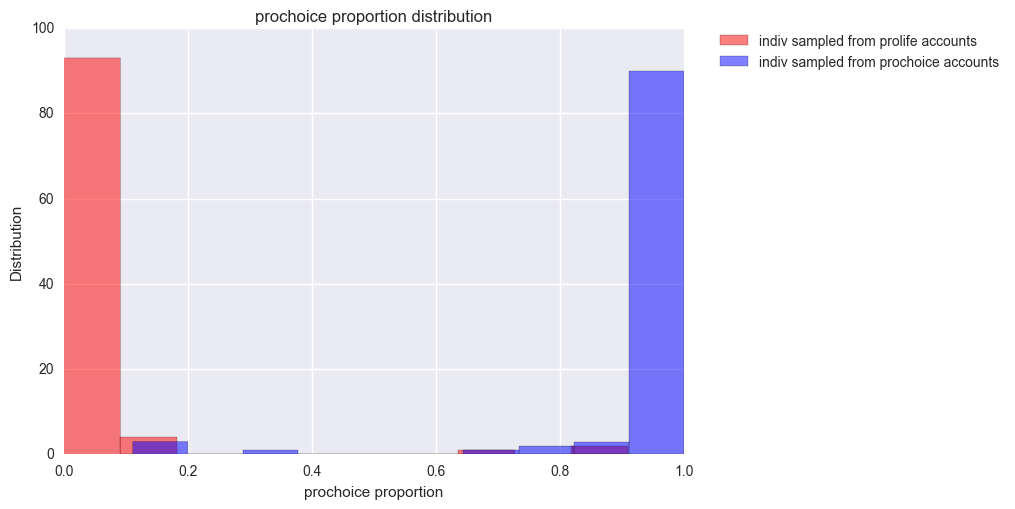

In [17]:
plt.hist(x=info_df.loc[info_df["follower of"]==1, "prochoice proportion"], color='r', alpha=0.5,
         label="indiv sampled from prolife accounts")
plt.hist(x=info_df.loc[info_df["follower of"]==-1, "prochoice proportion"], color='b', alpha=0.5,
         label="indiv sampled from prochoice accounts")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Distribution")
plt.xlabel("prochoice proportion")
plt.title("prochoice proportion distribution")
plt.show()

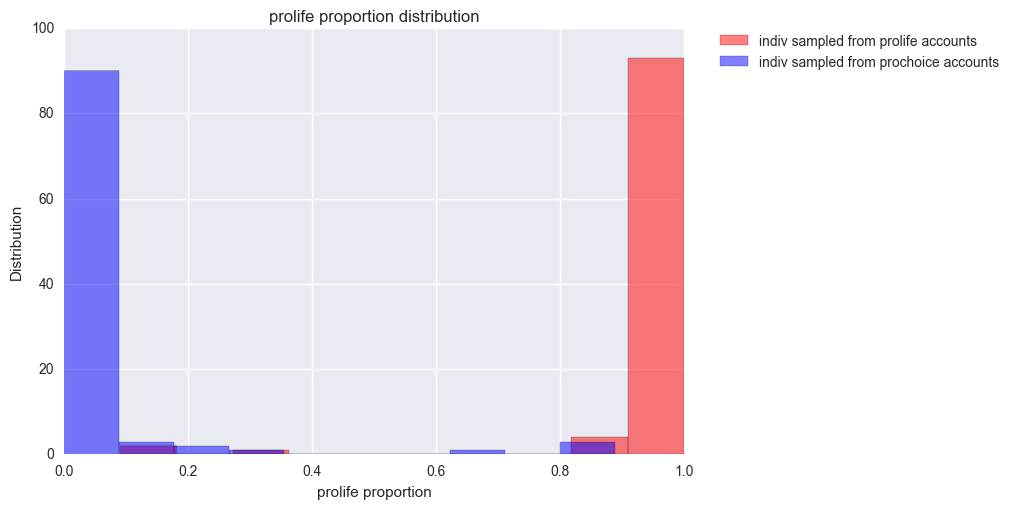

In [18]:
plt.hist(x=info_df.loc[info_df["follower of"]==1, "prolife proportion"], color='r', alpha=0.5,
         label="indiv sampled from prolife accounts")
plt.hist(x=info_df.loc[info_df["follower of"]==-1, "prolife proportion"], color='b', alpha=0.5,
         label="indiv sampled from prochoice accounts")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Distribution")
plt.xlabel("prolife proportion")
plt.title("prolife proportion distribution")
plt.show()